## Jupyter Notebook: Visualization Exploration

This notebook will explore visualization of data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.special import expit, softmax
import seaborn as sns
import plotly.express as px
import plotly.io as pio
#pio.renderers.default = "notebook"
pio.renderers.default = "iframe"
import bokeh
import altair as alt

# SEED
np.random.seed(1987)

In [2]:
# 1. ReLU
def relu(x):
    return np.maximum(0, x)

# 2. Tanh (Available in NumPy)
def tanh(x):
    return np.tanh(x)

# 3. Softmax (Available in SciPy)
def softmax_np(x):
    exp_x = np.exp(x - np.max(x))  # Prevent overflow
    return exp_x / np.sum(exp_x)

# 4. Softplus (Manually implemented)
def softplus(x):
    return np.log(1 + np.exp(x))  # Corrected, no softplus in SciPy

# 5. Sigmoid (Manually defined, but available in SciPy as expit)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))  # Or use scipy.special.expit(x)

# 6. Logistic (Same as Sigmoid, Available in SciPy)
def logistic(x):
    return expit(x)  # scipy.special.expit(x) is more numerically stable

def minmax_scaling(x):
    return (x - x.min()) / (x.max() - x.min())

In [3]:
def repeat(func, n=6, size=100, log_scale=False, **params):  

    df = pd.DataFrame()
    
    for i in range(n):
        modified_params = {key: value + i for key, value in params.items()}  # Modify params each iteration
        sample = func(size=size, **modified_params)  # Call function with updated params

        # Add artificial outliers (for visualization purposes)
        outliersL = np.random.gamma(shape=max(0, np.min(sample)-5), scale=1.0, size=10)  # Add 10 very small values
        outliersH = np.random.gamma(shape=min(20, np.max(sample)+5), scale=1.0, size=10)  # Add 10 very large values
        sample = np.append(sample, np.concatenate([outliersL, outliersH]))

        df[f"sample_{i}"] = minmax_scaling(sample)

    violin_plot(df, alpha=0.75, palette="colorblind", log_scale=log_scale)  # Call your violin plot function
    
    #return df  # Returning df for potential further analysis

In [4]:

def violin_plot_old(sample1, sample2, sample3, title):

    labels=("Sample 1", "Sample 2", "Sample 3")
    plt.figure(figsize=(8, 5))
    sns.violinplot(data=[sample1, sample2, sample3], inner="box")
    plt.xticks(ticks=[0, 1, 2], labels=labels)
    plt.ylabel("Value")
    plt.title(title)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.show()

In [5]:
# colorblind    Seaborn’s default colorblind-safe palette
# deep          Well-separated colors, readable in B&W
# muted         Softer colors, but still distinct
# dark          High-contrast for B&W printing
# Set1          Bold and distinguishable (also works in B&W)
# Set2          Softer, still good for B&W
# Set3          Larger variety of distinguishable colors
# Paired        Good for categories with similar colors
# cubehelix     Monochrome-variant, useful for B&W
# husl          Hue-based, optimized for color vision issues

def violin_plot(df, alpha=0.8, palette="colorblind", log_scale=False):

    # Convert the data
    
    
    # Create figure
    fig, ax = plt.subplots(figsize=(6, 4))  # Set figure size (width, height in inches)

    # Create the violin plot with thicker boxplots and a white background outlined in black
    ax = sns.violinplot(
        data=df,
        inner="box",  # Ensures inner boxplots are drawn
        linewidth=1.0,  # Makes boxplot outlines thicker
        palette=palette, 
        alpha=alpha
    )

    if log_scale:
        ax.set_yscale("log")  # Use logarithmic scale for Y-axis
    
    # Add black dots for the median of each violin plot
    for i, col in enumerate(df.columns):
        median_value = df[col].median()
        plt.scatter(i, median_value, color=sns.color_palette(palette)[i], edgecolors="black", s=50, zorder=3)

    # Adjust boxplot elements for better visibility
    for artist in ax.artists:
        artist.set_edgecolor("black")  # Outline the violins in black
        artist.set_facecolor("white")  # Make the boxplots have a white background
        artist.set_linewidth(1.5)  # Thicker lines

    # Add outliers as black dots
    sns.boxplot(
    data=df,
    width=0.3,  # <-- Reduce this to make boxplots thinner (default ~0.6)
    showfliers=True,  
    fliersize=5,  
    linewidth=1.5,  
    boxprops={"facecolor": "none"},  
    whiskerprops={"linewidth": 1.5},
    capprops={"linewidth": 0},  # <-- Set linewidth to 0 to REMOVE whisker caps
    medianprops={"linewidth": 2},
    flierprops={"marker": "o", "color": "black", "markersize": 5}
    )

    # Add horizontal line
    plt.axhline(y=0, color="red", linestyle="dashed", linewidth=1)  # Red dashed line at y=0
    plt.axhline(y=1, color="blue", linestyle="dotted", linewidth=1)  # Blue dotted line at y=1

    # Add vertical line
    #plt.axvline(x=2, color="green", linestyle="dashed", linewidth=1)  # Green dashed line at x=2
    #plt.axvline(x=4, color="purple", linestyle="dotted", linewidth=1)  # Purple dotted line at x=4

    # Remove axis details
    plt.xticks([])
    plt.yticks([])
    plt.gca().set_frame_on(False)
    plt.show()

    # Save in different formats
    #fig.savefig("figure.png", dpi=300, format="png")  # High DPI PNG
    #fig.savefig("figure.tiff", dpi=300, format="tiff")  # TIFF (print-friendly)
    #fig.savefig("figure.eps", format="eps", dpi=300)  # EPS (vector format, no transparency)
    #fig.savefig("figure.pdf", format="pdf", transparent=True, dpi=300)  # PDF (editable)
    #fig.savefig("figure.svg", format="svg", transparent=True, dpi=300)  # SVG (best for editing)

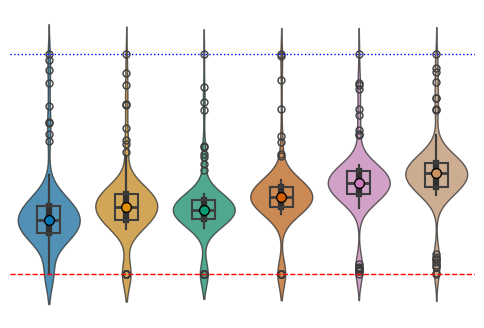

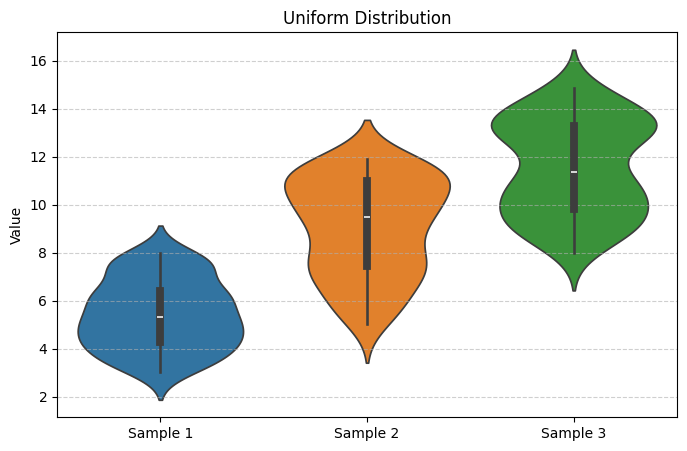

In [6]:
# 1. Uniform Distribution

repeat(np.random.uniform, n=6, size=100, log_scale=False, low=2, high=5)

# 1. Uniform Distribution
sample1 = np.random.uniform(3, 8, size=100)
sample2 = np.random.uniform(5, 12, size=100)
sample3 = np.random.uniform(8, 15, size=100)
violin_plot_old(sample1, sample2, sample3, "Uniform Distribution")

# sample1 = np.random.uniform(low=2, high=5, size=100)
# outliers = np.random.gamma(shape=15.0, scale=1.0, size=10)  # Outliers from a normal dist.
# sample1 = minmax_scaling(np.append(sample1, outliers))

# sample2 = np.random.uniform(5, 12, size=100)
# outliers = np.random.gamma(shape=0.0, scale=1.0, size=10)  # Outliers from a normal dist.
# sample2 = minmax_scaling(np.append(sample2, outliers))

# sample3 = np.random.uniform(8, 15, size=100)
# outliers = np.random.gamma(shape=0.0, scale=1.0, size=10)  # Outliers from a normal dist.
# sample3 = minmax_scaling(np.append(sample3, outliers))

# sample4 = np.random.uniform(3, 9, size=100)
# outliers = np.random.gamma(shape=20.0, scale=1.0, size=10)  # Outliers from a normal dist.
# sample4 = minmax_scaling(np.append(sample4, outliers))

# sample5 = np.random.uniform(5, 13, size=100)
# outliers = np.random.gamma(shape=0.0, scale=1.0, size=10)  # Outliers from a normal dist.
# sample5 = minmax_scaling(np.append(sample5, outliers))

# sample6 = np.random.uniform(8, 16, size=100)
# outliers = np.random.gamma(shape=1.0, scale=1.0, size=10)  # Outliers from a normal dist.
# sample6 = minmax_scaling(np.append(sample6, outliers))

# # Convert to a DataFrame
# df = pd.DataFrame({
#     "Sample 1": sample1,
#     "Sample 2": sample2,
#     "Sample 3": sample3,
#     "Sample 4": sample4,
#     "Sample 5": sample5,
#     "Sample 6": sample6
# })
# violin_plot(df, alpha=0.75, palette="colorblind")

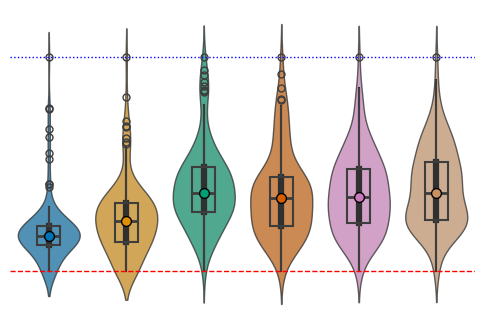

In [77]:
# 2. Normal (Gaussian) Distribution

repeat(np.random.normal, n=6, size=100, log_scale=False, loc=3, scale=1)

# 2. Normal (Gaussian) Distribution
sample1 = np.random.normal(loc=5, scale=1, size=100)
sample2 = np.random.normal(loc=10, scale=2, size=100)
sample3 = np.random.normal(loc=15, scale=3, size=100)
violin_plot_old(sample1, sample2, sample3, "Normal (Gaussian) Distribution")

# sample1 = np.random.normal(loc=5, scale=1, size=100)
# outliersL = np.random.gamma(shape=0.0, scale=1.0, size=10)
# outliersH = np.random.gamma(shape=0.0, scale=1.0, size=10)
# sample1 = minmax_scaling(np.append(sample1, np.append(outliersL, outliersH)))

# sample2 = np.random.normal(loc=10, scale=2, size=100)
# outliersL = np.random.gamma(shape=0.0, scale=1.0, size=10)
# outliersH = np.random.gamma(shape=0.0, scale=1.0, size=10)
# sample2 = minmax_scaling(np.append(sample2, np.append(outliersL, outliersH)))

# sample3 = np.random.normal(loc=15, scale=3, size=100)
# outliersL = np.random.gamma(shape=0.0, scale=1.0, size=10)
# outliersH = np.random.gamma(shape=0.0, scale=1.0, size=10)
# sample3 = minmax_scaling(np.append(sample3, np.append(outliersL, outliersH)))

# sample4 = np.random.normal(loc=8, scale=3, size=100)
# outliersL = np.random.gamma(shape=0.0, scale=1.0, size=10)
# outliersH = np.random.gamma(shape=0.0, scale=1.0, size=10)
# sample4 = minmax_scaling(np.append(sample4, np.append(outliersL, outliersH)))

# sample5 = np.random.normal(loc=12, scale=1, size=100)
# outliersL = np.random.gamma(shape=0.0, scale=1.0, size=10)
# outliersH = np.random.gamma(shape=0.0, scale=1.0, size=10)
# sample5 = minmax_scaling(np.append(sample5, np.append(outliersL, outliersH)))

# sample6 = np.random.normal(loc=13, scale=3, size=100)
# outliersL = np.random.gamma(shape=0.0, scale=1.0, size=10)
# outliersH = np.random.gamma(shape=0.0, scale=1.0, size=10)
# sample6 = minmax_scaling(np.append(sample6, np.append(outliersL, outliersH)))

# # Convert to a DataFrame
# df = pd.DataFrame({
#     "Sample 1": sample1,
#     "Sample 2": sample2,
#     "Sample 3": sample3,
#     "Sample 4": sample4,
#     "Sample 5": sample5,
#     "Sample 6": sample6
# })
# violin_plot(df, alpha=0.75, palette="colorblind")

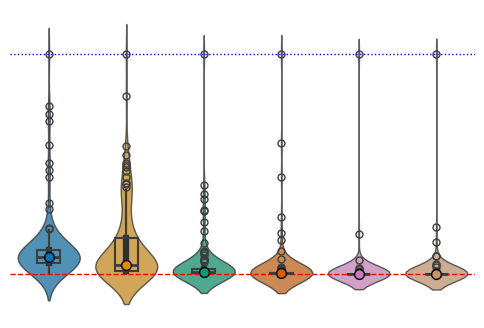

In [78]:
# 3. Log-Normal Distribution

repeat(np.random.lognormal, n=6, size=100, log_scale=False, mean=0, sigma=0.5)

# 3. Log-Normal Distribution
sample1 = np.random.lognormal(mean=0, sigma=0.5, size=100)
sample2 = np.random.lognormal(mean=1, sigma=0.7, size=100)
sample3 = np.random.lognormal(mean=1.5, sigma=1.0, size=100)
violin_plot_old(sample1, sample2, sample3, "Log-Normal Distribution")

# sample1 = np.random.lognormal(mean=0, sigma=0.5, size=100)
# outliersL = np.random.gamma(shape=0.0, scale=2.0, size=10)
# outliersH = np.random.gamma(shape=5.0, scale=2.0, size=10)
# sample1 = minmax_scaling(np.append(sample1, np.append(outliersL, outliersH)))

# sample2 = np.random.lognormal(mean=1, sigma=0.7, size=100)
# outliersL = np.random.gamma(shape=0.0, scale=2.0, size=10)
# outliersH = np.random.gamma(shape=6.0, scale=2.0, size=10)
# sample2 = minmax_scaling(np.append(sample2, np.append(outliersL, outliersH)))

# sample3 = np.random.lognormal(mean=1.5, sigma=1.0, size=100)
# outliersL = np.random.gamma(shape=0.0, scale=2.0, size=10)
# outliersH = np.random.gamma(shape=7.0, scale=2.0, size=10)
# sample3 = minmax_scaling(np.append(sample3, np.append(outliersL, outliersH)))

# sample4 = np.random.lognormal(mean=0.5, sigma=1.0, size=100)
# outliersL = np.random.gamma(shape=0.0, scale=2.0, size=10)
# outliersH = np.random.gamma(shape=6.0, scale=2.0, size=10)
# sample4 = minmax_scaling(np.append(sample4, np.append(outliersL, outliersH)))

# sample5 = np.random.lognormal(mean=1.5, sigma=1.1, size=100)
# outliersL = np.random.gamma(shape=0.0, scale=2.0, size=10)
# outliersH = np.random.gamma(shape=5.0, scale=2.0, size=10)
# sample5 = minmax_scaling(np.append(sample5, np.append(outliersL, outliersH)))

# sample6 = np.random.lognormal(mean=0.2, sigma=2.0, size=100)
# outliersL = np.random.gamma(shape=0.0, scale=2.0, size=10)
# outliersH = np.random.gamma(shape=8.0, scale=2.0, size=10)
# sample6 = minmax_scaling(np.append(sample6, np.append(outliersL, outliersH)))

# # Convert to a DataFrame
# df = pd.DataFrame({
#     "Sample 1": sample1,
#     "Sample 2": sample2,
#     "Sample 3": sample3,
#     "Sample 4": sample4,
#     "Sample 5": sample5,
#     "Sample 6": sample6
# })
# violin_plot(df, alpha=0.75, palette="colorblind")

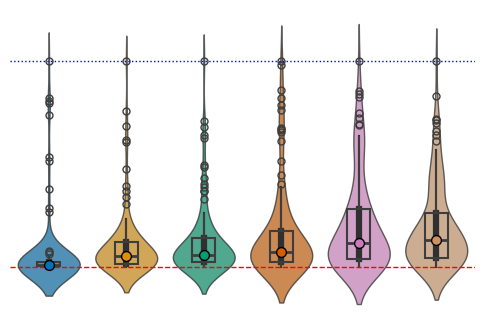

In [79]:
# 4. Exponential Distribution

repeat(np.random.exponential, n=6, size=100, log_scale=False, scale=0.1)

# 4. Exponential Distribution
sample1 = np.random.exponential(scale=1.0, size=100)
sample2 = np.random.exponential(scale=2.0, size=100)
sample3 = np.random.exponential(scale=3.0, size=100)
violin_plot_old(sample1, sample2, sample3, "Exponential Distribution")

# sample1 = np.random.exponential(scale=1.0, size=100)
# sample2 = np.random.exponential(scale=2.0, size=100)
# sample3 = np.random.exponential(scale=3.0, size=100)
# violin_plot_old(sample1, sample2, sample3, "Exponential Distribution")

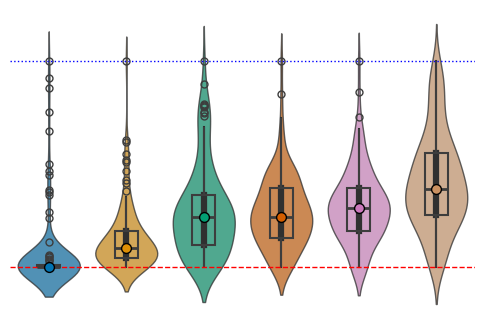

In [80]:
# 5. Gamma Distribution

repeat(np.random.gamma, n=6, size=100, log_scale=False, shape=0.1, scale=1.1)

# 5. Gamma Distribution
sample1 = np.random.gamma(shape=2.0, scale=1.0, size=100)
sample2 = np.random.gamma(shape=5.0, scale=1.0, size=100)
sample3 = np.random.gamma(shape=9.0, scale=1.0, size=100)
violin_plot_old(sample1, sample2, sample3, "Gamma Distribution")

# sample1 = np.random.gamma(shape=2.0, scale=1.0, size=100)
# sample2 = np.random.gamma(shape=5.0, scale=1.0, size=100)
# sample3 = np.random.gamma(shape=9.0, scale=1.0, size=100)
# violin_plot_old(sample1, sample2, sample3, "Gamma Distribution")

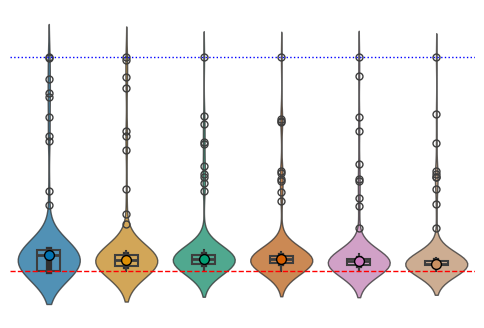

In [81]:
# 6. Beta Distribution

repeat(np.random.beta, n=6, size=100, log_scale=False, a=0.1, b=0.1)

# 6. Beta Distribution
sample1 = np.random.beta(a=2.0, b=5.0, size=100)
sample2 = np.random.beta(a=5.0, b=2.0, size=100)
sample3 = np.random.beta(a=2.0, b=2.0, size=100)
violin_plot_old(sample1, sample2, sample3, "Beta Distribution")

# sample1 = np.random.beta(a=2.0, b=5.0, size=100)
# sample2 = np.random.beta(a=5.0, b=2.0, size=100)
# sample3 = np.random.beta(a=2.0, b=2.0, size=100)
# violin_plot_old(sample1, sample2, sample3, "Beta Distribution")

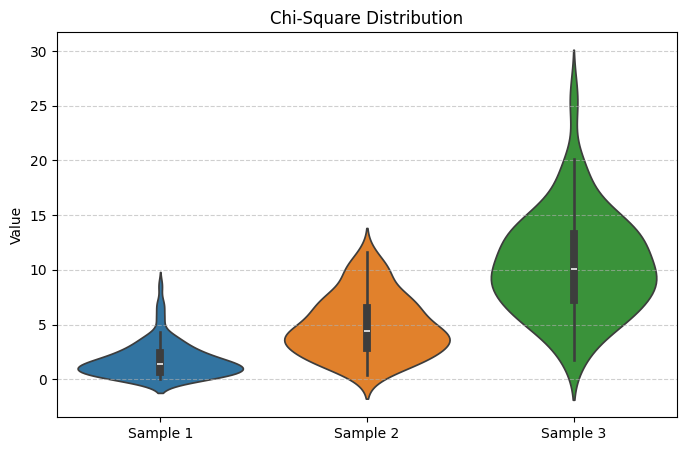

In [82]:
# 7. Chi-Square Distribution
sample1 = np.random.chisquare(df=2, size=100)
sample2 = np.random.chisquare(df=5, size=100)
sample3 = np.random.chisquare(df=10, size=100)
violin_plot_old(sample1, sample2, sample3, "Chi-Square Distribution")

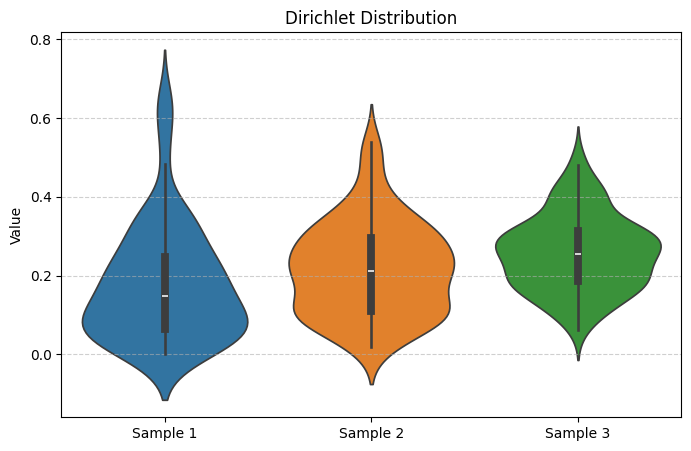

In [26]:
# 8. Dirichlet Distribution
sample1 = np.random.dirichlet(alpha=[1, 2, 3], size=100)[:, 0]
sample2 = np.random.dirichlet(alpha=[2, 3, 4], size=100)[:, 0]
sample3 = np.random.dirichlet(alpha=[3, 4, 5], size=100)[:, 0]
violin_plot_old(sample1, sample2, sample3, "Dirichlet Distribution")

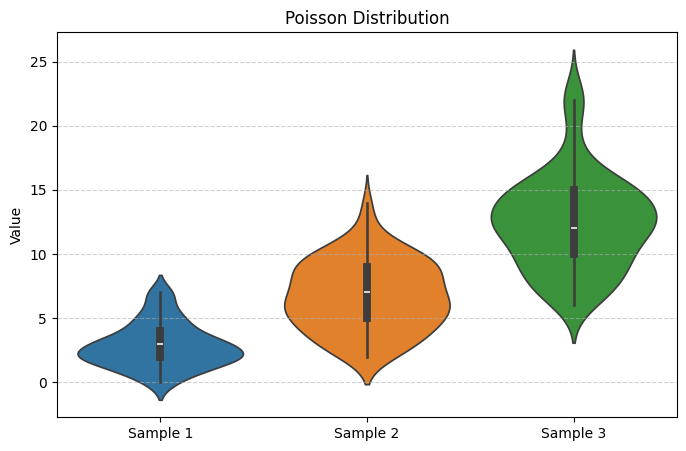

In [27]:
# 9. Poisson Distribution
sample1 = np.random.poisson(lam=3, size=100)
sample2 = np.random.poisson(lam=7, size=100)
sample3 = np.random.poisson(lam=12, size=100)
violin_plot_old(sample1, sample2, sample3, "Poisson Distribution")

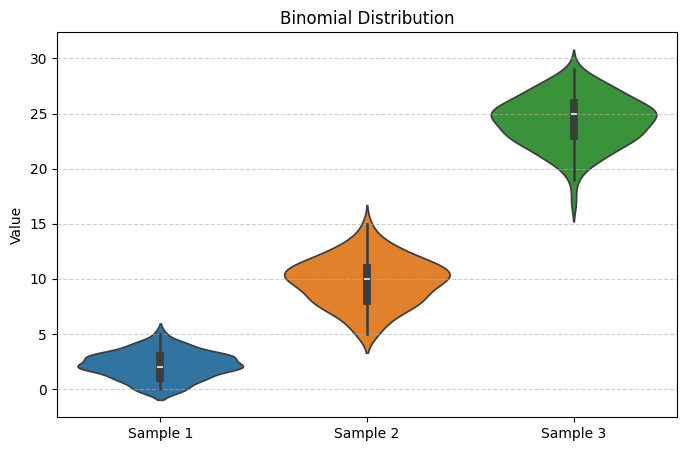

In [28]:
# 10. Binomial Distribution
sample1 = np.random.binomial(n=10, p=0.2, size=100)
sample2 = np.random.binomial(n=20, p=0.5, size=100)
sample3 = np.random.binomial(n=30, p=0.8, size=100)
violin_plot_old(sample1, sample2, sample3, "Binomial Distribution")

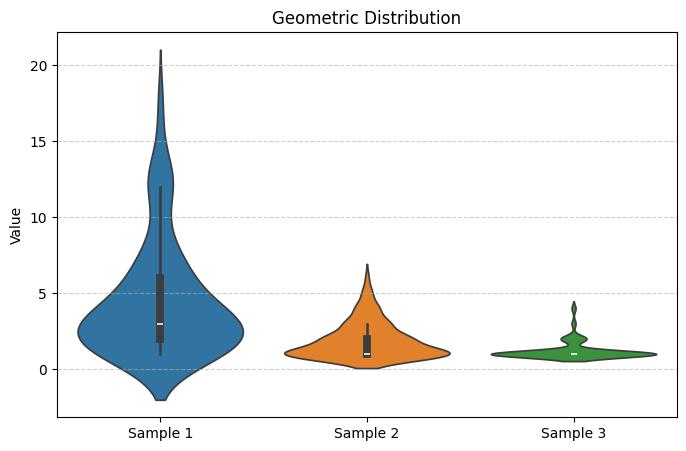

In [29]:
# 11. Geometric Distribution
sample1 = np.random.geometric(p=0.2, size=100)
sample2 = np.random.geometric(p=0.5, size=100)
sample3 = np.random.geometric(p=0.8, size=100)
violin_plot_old(sample1, sample2, sample3, "Geometric Distribution")

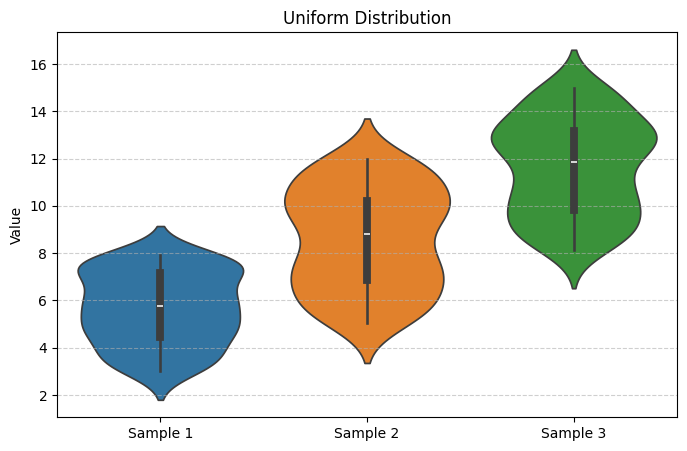

In [30]:
from scipy.stats import uniform

# 1. Uniform Distribution
sample1 = uniform.rvs(loc=3, scale=5, size=100)
sample2 = uniform.rvs(loc=5, scale=7, size=100)
sample3 = uniform.rvs(loc=8, scale=7, size=100)
violin_plot_old(sample1, sample2, sample3, "Uniform Distribution")

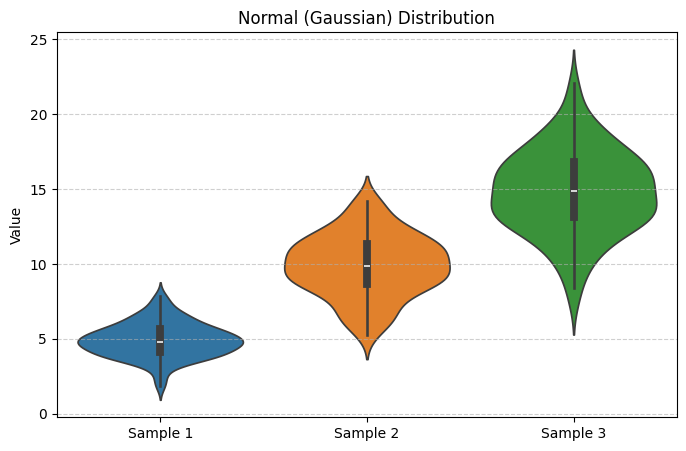

In [31]:
from scipy.stats import norm

# 2. Normal (Gaussian) Distribution
sample1 = norm.rvs(loc=5, scale=1, size=100)
sample2 = norm.rvs(loc=10, scale=2, size=100)
sample3 = norm.rvs(loc=15, scale=3, size=100)
violin_plot_old(sample1, sample2, sample3, "Normal (Gaussian) Distribution")

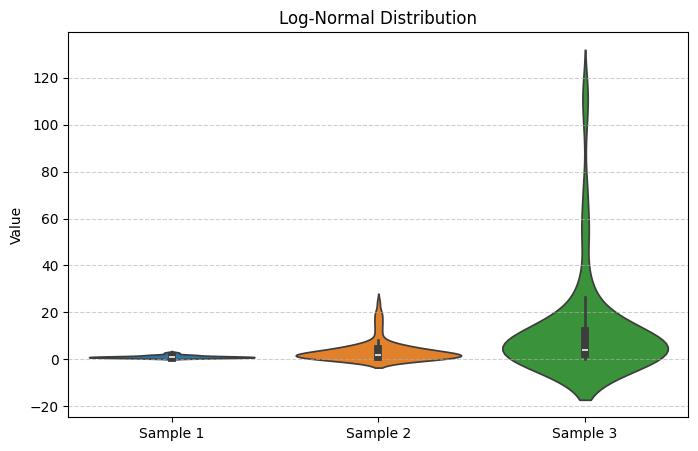

In [32]:
from scipy.stats import lognorm

# 3. Log-Normal Distribution
sample1 = lognorm.rvs(s=0.5, loc=0, scale=1, size=100)
sample2 = lognorm.rvs(s=1, loc=0, scale=2, size=100)
sample3 = lognorm.rvs(s=1.5, loc=0, scale=3, size=100)
violin_plot_old(sample1, sample2, sample3, "Log-Normal Distribution")

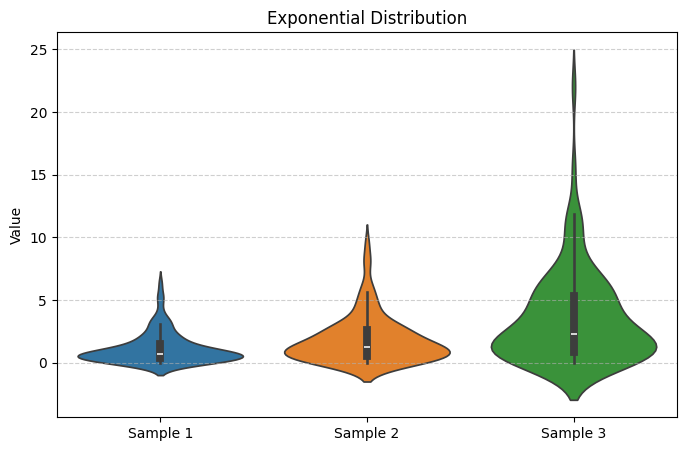

In [33]:
from scipy.stats import expon, gamma, beta

# 4. Exponential Distribution
sample1 = expon.rvs(scale=1, size=100)
sample2 = expon.rvs(scale=2, size=100)
sample3 = expon.rvs(scale=3, size=100)
violin_plot_old(sample1, sample2, sample3, "Exponential Distribution")

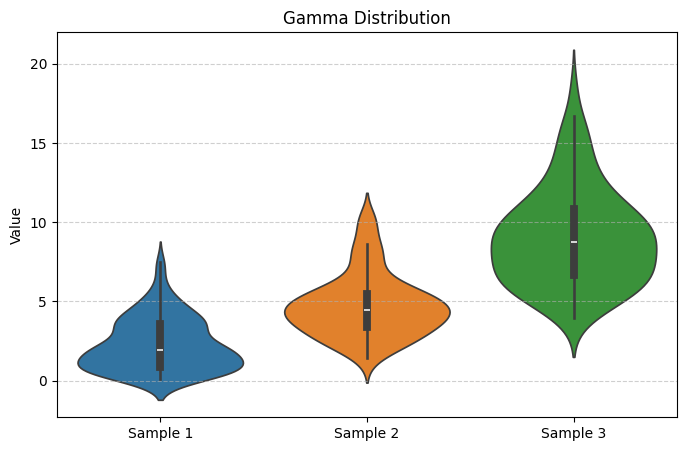

In [34]:
from scipy.stats import expon, gamma, beta

# 5. Gamma Distribution
sample1 = gamma.rvs(a=2, scale=1, size=100)
sample2 = gamma.rvs(a=5, scale=1, size=100)
sample3 = gamma.rvs(a=9, scale=1, size=100)
violin_plot_old(sample1, sample2, sample3, "Gamma Distribution")

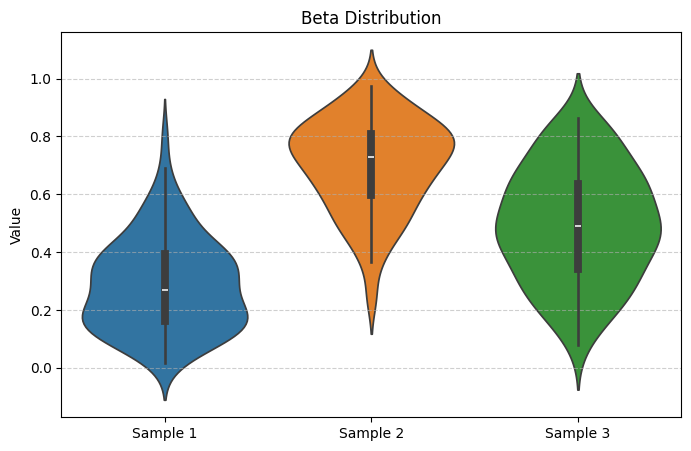

In [35]:
from scipy.stats import expon, gamma, beta

# 6. Beta Distribution
sample1 = beta.rvs(a=2, b=5, size=100)
sample2 = beta.rvs(a=5, b=2, size=100)
sample3 = beta.rvs(a=3, b=3, size=100)
violin_plot_old(sample1, sample2, sample3, "Beta Distribution")

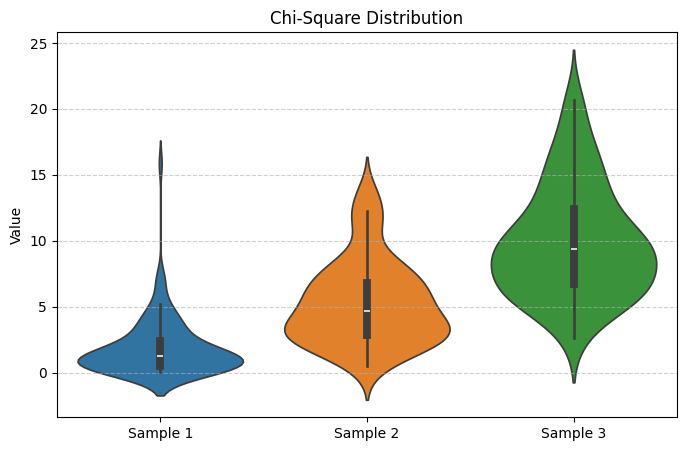

In [36]:
from scipy.stats import chi2, dirichlet, poisson
import numpy as np

# 7. Chi-Square Distribution
sample1 = chi2.rvs(df=2, size=100)
sample2 = chi2.rvs(df=5, size=100)
sample3 = chi2.rvs(df=10, size=100)
violin_plot_old(sample1, sample2, sample3, "Chi-Square Distribution")

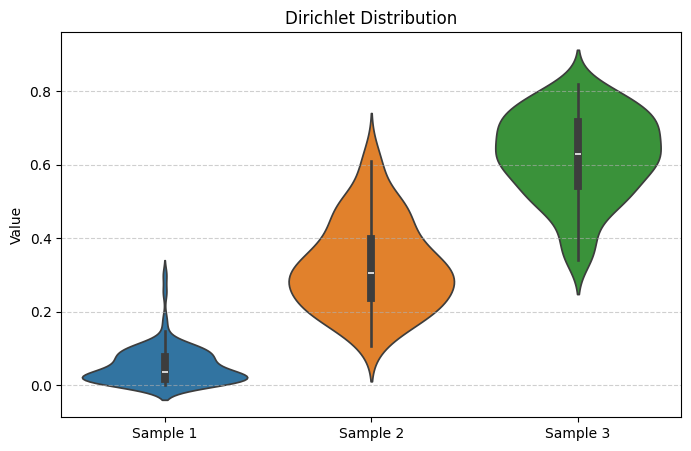

In [37]:
from scipy.stats import chi2, dirichlet, poisson
import numpy as np

# 8. Dirichlet Distribution (sum of elements in each row = 1, only one dimension per category)
dirichlet_samples = dirichlet.rvs([1, 5, 10], size=100)
sample1 = dirichlet_samples[:, 0]
sample2 = dirichlet_samples[:, 1]
sample3 = dirichlet_samples[:, 2]
violin_plot_old(sample1, sample2, sample3, "Dirichlet Distribution")

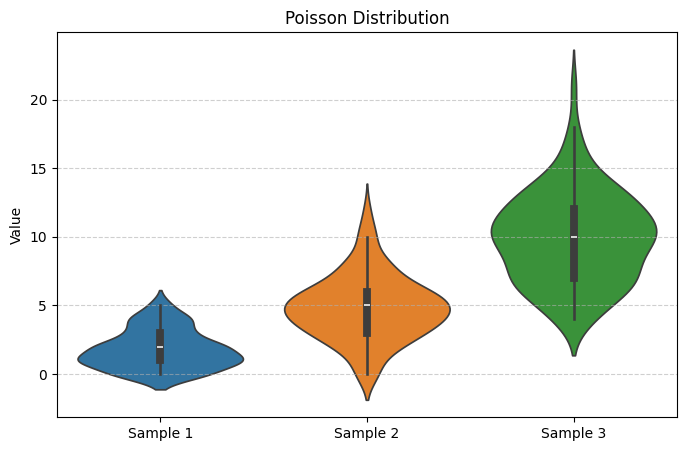

In [38]:
from scipy.stats import chi2, dirichlet, poisson
import numpy as np

# 9. Poisson Distribution
sample1 = poisson.rvs(mu=2, size=100)
sample2 = poisson.rvs(mu=5, size=100)
sample3 = poisson.rvs(mu=10, size=100)
violin_plot_old(sample1, sample2, sample3, "Poisson Distribution")

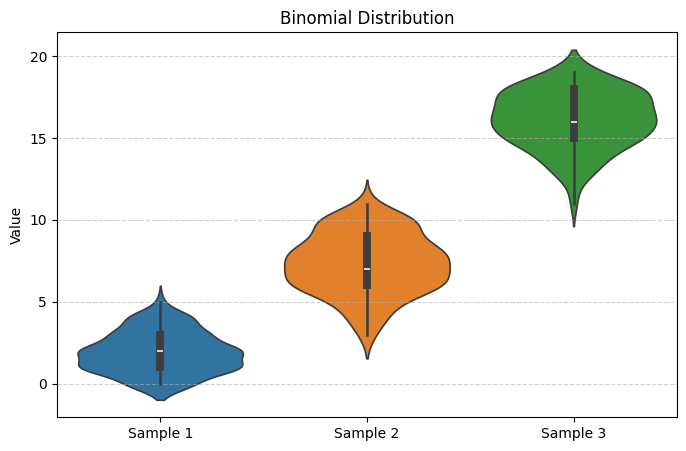

In [39]:
from scipy.stats import binom, nbinom, geom
import numpy as np

# 10. Binomial Distribution
sample1 = binom.rvs(n=10, p=0.2, size=100)
sample2 = binom.rvs(n=15, p=0.5, size=100)
sample3 = binom.rvs(n=20, p=0.8, size=100)
violin_plot_old(sample1, sample2, sample3, "Binomial Distribution")

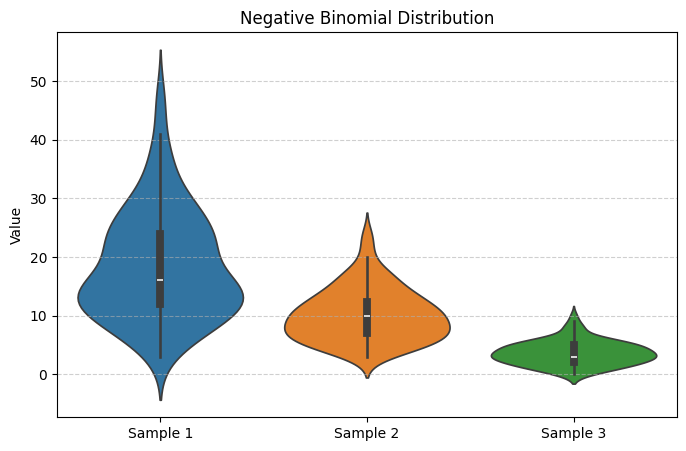

In [40]:
from scipy.stats import binom, nbinom, geom
import numpy as np

# 11. Negative Binomial Distribution
sample1 = nbinom.rvs(n=5, p=0.2, size=100)
sample2 = nbinom.rvs(n=10, p=0.5, size=100)
sample3 = nbinom.rvs(n=15, p=0.8, size=100)
violin_plot_old(sample1, sample2, sample3, "Negative Binomial Distribution")

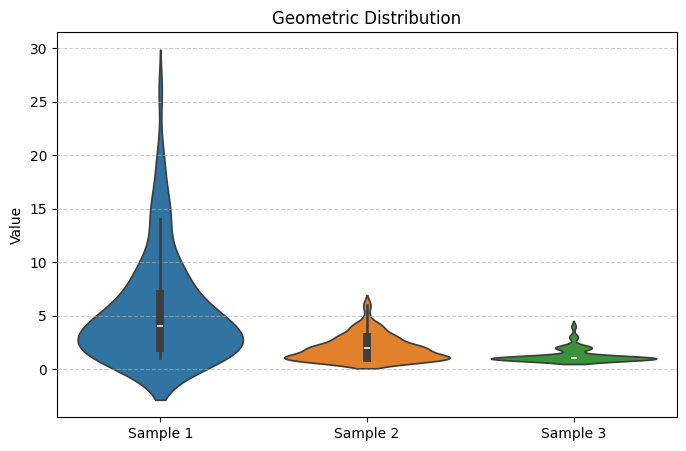

In [41]:
from scipy.stats import binom, nbinom, geom
import numpy as np

# 12. Geometric Distribution
sample1 = geom.rvs(p=0.2, size=100)
sample2 = geom.rvs(p=0.5, size=100)
sample3 = geom.rvs(p=0.8, size=100)
violin_plot_old(sample1, sample2, sample3, "Geometric Distribution")

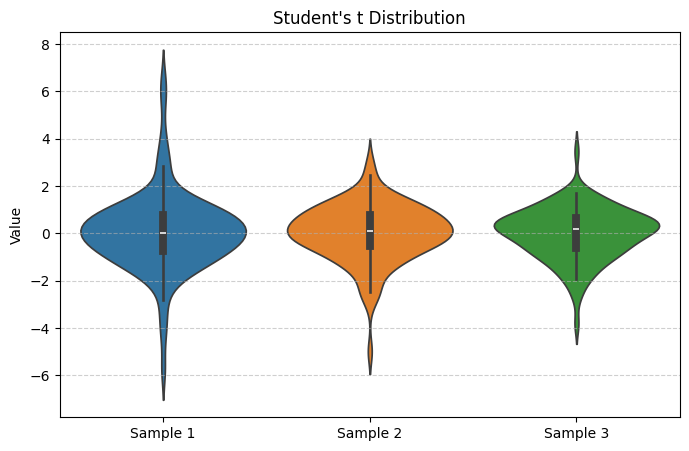

In [42]:
from scipy.stats import t, weibull_min, cauchy
import numpy as np

# 13. Student's t Distribution
sample1 = t.rvs(df=2, size=100)
sample2 = t.rvs(df=5, size=100)
sample3 = t.rvs(df=10, size=100)
violin_plot_old(sample1, sample2, sample3, "Student's t Distribution")

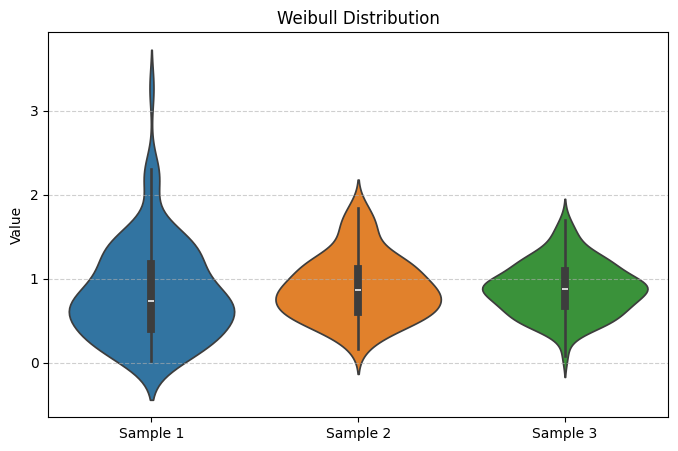

In [43]:
from scipy.stats import t, weibull_min, cauchy
import numpy as np

# 14. Weibull Distribution
sample1 = weibull_min.rvs(c=1.5, size=100)
sample2 = weibull_min.rvs(c=2.5, size=100)
sample3 = weibull_min.rvs(c=3.5, size=100)
violin_plot_old(sample1, sample2, sample3, "Weibull Distribution")

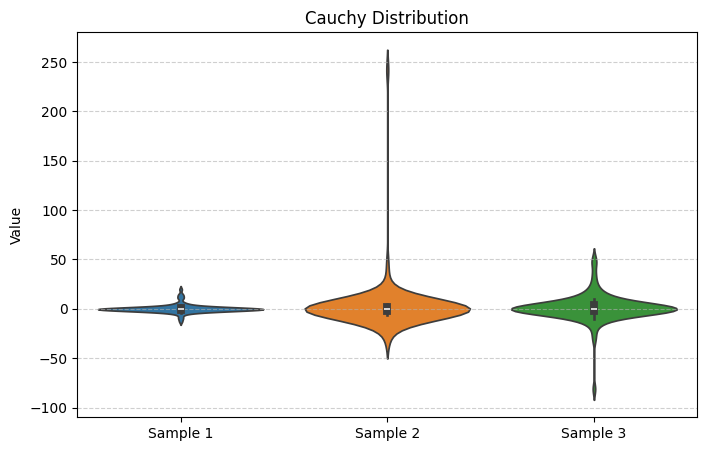

In [44]:
from scipy.stats import t, weibull_min, cauchy
import numpy as np

# 15. Cauchy Distribution
sample1 = cauchy.rvs(loc=0, scale=1, size=100)
sample2 = cauchy.rvs(loc=0, scale=2, size=100)
sample3 = cauchy.rvs(loc=0, scale=3, size=100)
violin_plot_old(sample1, sample2, sample3, "Cauchy Distribution")